In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

In [7]:
df1 = yf.download('BNB-USD', 
                       start='2020-01-01', 
                       end='2023-01-01',
                       progress=False)
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+00:00,13.730962,13.873946,13.654942,13.689083,13.689083,172980718
2020-01-02 00:00:00+00:00,13.698126,13.715548,12.989974,13.027011,13.027011,156376427
2020-01-03 00:00:00+00:00,13.035329,13.763709,13.012638,13.660452,13.660452,173683857
2020-01-04 00:00:00+00:00,13.667442,13.921914,13.560008,13.891512,13.891512,182230374
2020-01-05 00:00:00+00:00,13.888340,14.410801,13.886547,14.111019,14.111019,202552703
...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,244.202652,247.679688,242.562180,246.596680,246.596680,391342277
2022-12-28 00:00:00+00:00,246.607117,246.840042,242.109283,244.141922,244.141922,414698978
2022-12-29 00:00:00+00:00,244.171417,246.600998,243.579910,246.479721,246.479721,345312528


In [8]:
df2 = yf.download('ETH-USD', 
                       start='2020-01-01', 
                       end='2023-01-01',
                       progress=False)
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353
...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,1226.987061,1230.418091,1205.895630,1212.791626,1212.791626,4091530737
2022-12-28 00:00:00+00:00,1212.736572,1213.128906,1185.702148,1189.986084,1189.986084,4991669631
2022-12-29 00:00:00+00:00,1190.010132,1204.141602,1188.360229,1201.595337,1201.595337,4132233940


In [9]:
#pastram doar preturile de inchidere ajustate
df1 = df1.loc[:, ['Adj Close']]
df1.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df2 = df2.loc[:, ['Adj Close']]
df2.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [10]:
#convertirea preturilor in randamente simple si logaritmate
df1['simple_rtn'] = df1.adj_close.pct_change()
df1['log_rtn'] = np.log(df1.adj_close/df1.adj_close.shift(1))

df1.dropna(how = 'any', inplace = True)
df2['simple_rtn'] = df2.adj_close.pct_change()
df2['log_rtn'] = np.log(df2.adj_close/df2.adj_close.shift(1))

df2.dropna(how = 'any', inplace = True)

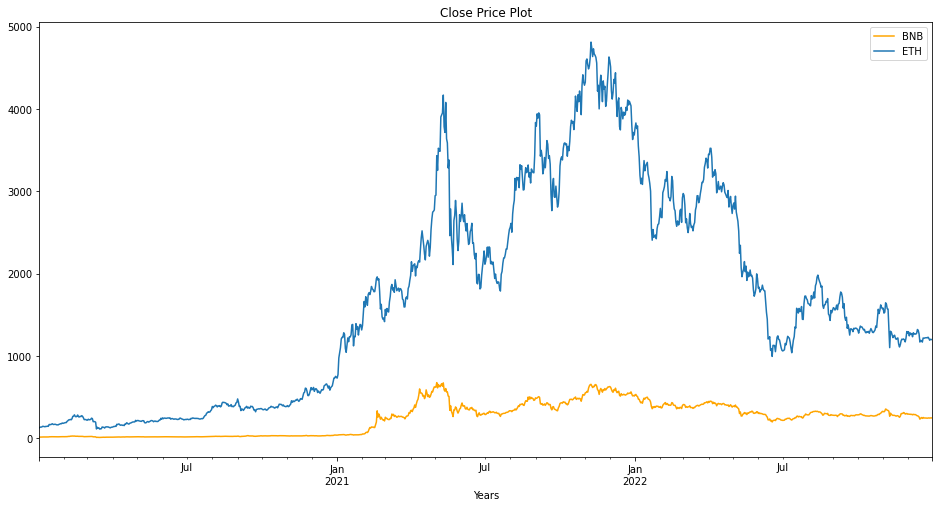

In [12]:
# set the plot size
plt.figure(figsize=(16, 8))
  
df1['adj_close'].plot(label='BNB', color='orange')
df2['adj_close'].plot(label='ETH')
  
# adding title to the plot
plt.title('Close Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of BNB returns')

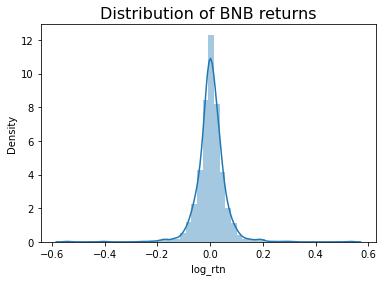

In [13]:
# histograma
fig = sns.distplot(df1.log_rtn, kde=True, norm_hist=True)                                    
fig.set_title('Distribution of BNB returns', fontsize=16)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ETH returns')

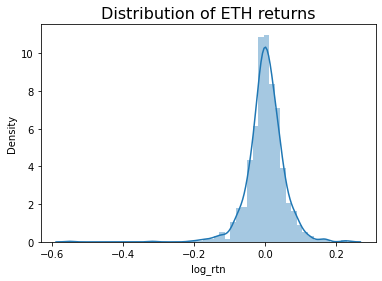

In [14]:
# histogram
fig = sns.distplot(df2.log_rtn, kde=True, norm_hist=True)                                    
fig.set_title('Distribution of ETH returns', fontsize=16)

In [15]:
jb_test = scs.jarque_bera(df1.log_rtn.values)

print('---------- Descriptive Statistics BNB ----------')
print('Range of dates:', min(df1.index.date), '-', max(df1.index.date))
print('Number of observations:', df1.shape[0])
print(f'Mean: {df1.log_rtn.mean():.4f}')
print(f'Median: {df1.log_rtn.median():.4f}')
print(f'Min: {df1.log_rtn.min():.4f}')
print(f'Max: {df1.log_rtn.max():.4f}')
print(f'Standard Deviation: {df1.log_rtn.std():.4f}')
print(f'Skewness: {df1.log_rtn.skew():.4f}')
print(f'Kurtosis: {df1.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics BNB ----------
Range of dates: 2020-01-02 - 2022-12-31
Number of observations: 1095
Mean: 0.0026
Median: 0.0015
Min: -0.5431
Max: 0.5292
Standard Deviation: 0.0561
Skewness: -0.2758
Kurtosis: 19.8751
Jarque-Bera statistic: 17862.68 with p-value: 0.00


In [16]:
jb_test = scs.jarque_bera(df2.log_rtn.values)

print('---------- Descriptive Statistics ETH ----------')
print('Range of dates:', min(df2.index.date), '-', max(df2.index.date))
print('Number of observations:', df2.shape[0])
print(f'Mean: {df2.log_rtn.mean():.4f}')
print(f'Median: {df2.log_rtn.median():.4f}')
print(f'Min: {df2.log_rtn.min():.4f}')
print(f'Max: {df2.log_rtn.max():.4f}')
print(f'Standard Deviation: {df2.log_rtn.std():.4f}')
print(f'Skewness: {df2.log_rtn.skew():.4f}')
print(f'Kurtosis: {df2.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ETH ----------
Range of dates: 2020-01-02 - 2022-12-31
Number of observations: 1095
Mean: 0.0020
Median: 0.0029
Min: -0.5507
Max: 0.2307
Standard Deviation: 0.0517
Skewness: -1.3598
Kurtosis: 14.4885
Jarque-Bera statistic: 9819.56 with p-value: 0.00
